In [8]:
pip install tensorflow

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install sklearn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/TensorFlow-2.1/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error

# 读取训练集和测试集数据
train_data = pd.read_csv("train_data(1).csv")
test_data = pd.read_csv("test_data(1).csv")

# 提取特征和目标变量
X_train = train_data.drop(columns=["Discharge","Date","Swe","Srad","Tmin","Dayl"]).values
y_train = train_data["Discharge"].values
X_test = test_data.drop(columns=["Discharge","Date","Swe","Srad","Tmin","Dayl"]).values
y_test = test_data["Discharge"].values


# 定义神经网络模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 训练模型
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

# 评估模型
test_loss, test_mae = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

# 使用模型进行预测
predictions = model.predict(X_test)
print("Predicted values:",predictions)
print("True values:", y_test)

Train on 1168 samples, validate on 293 samples
Epoch 1/50
1168/1168 [==============================] - 0s 243us/sample - loss: 18073.6393 - mae: 87.3939 - val_loss: 40843.8648 - val_mae: 136.0350
Epoch 2/50
1168/1168 [==============================] - 0s 125us/sample - loss: 15941.1678 - mae: 75.9293 - val_loss: 34228.3782 - val_mae: 111.4142
Epoch 3/50
1168/1168 [==============================] - 0s 101us/sample - loss: 11700.1481 - mae: 61.0141 - val_loss: 26811.1342 - val_mae: 99.4850
Epoch 4/50
1168/1168 [==============================] - 0s 153us/sample - loss: 10544.4091 - mae: 62.3813 - val_loss: 26036.8886 - val_mae: 99.6452
Epoch 5/50
1168/1168 [==============================] - 0s 104us/sample - loss: 10434.1193 - mae: 62.8003 - val_loss: 25838.2727 - val_mae: 98.9073
Epoch 6/50
1168/1168 [==============================] - 0s 157us/sample - loss: 10361.3955 - mae: 61.8299 - val_loss: 25278.8639 - val_mae: 98.9545
Epoch 7/50
1168/1168 [==============================] - 0s 102u

In [25]:

# 计算均方误差（Mean Squared Error，MSE）
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# 计算均方根误差（Root Mean Squared Error，RMSE）
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 计算平均绝对误差（Mean Absolute Error，MAE）
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)# 计算决定系数（Coefficient of Determination，R²）


# 计算平均绝对百分比误差（Mean Absolute Percentage Error，MAPE）
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print("Mean Absolute Percentage Error (MAPE):", mape)

# # 计算相关系数（Pearson Correlation Coefficient，r）
# corr = np.corrcoef(y_test, predictions)[0, 1]
# print("Pearson Correlation Coefficient (r):", corr) 

r2 = r2_score(y_test, predictions)
print("Coefficient of Determination (R²):", r2)

Mean Squared Error (MSE): 5764.279218349184
Root Mean Squared Error (RMSE): 75.92285043614461
Mean Absolute Error (MAE): 49.36109795075297
Mean Absolute Percentage Error (MAPE): 93.94572172241563
Coefficient of Determination (R²): 0.31066742923104984


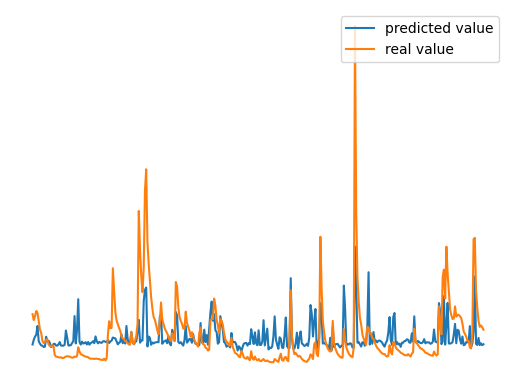

In [26]:
import matplotlib.pyplot as plt
p1 = predictions
#y1 = X_test[:, 0]
p2 = y_test
#y2 = X_test[:, 0]

plt.plot(p1)
plt.plot(p2)

plt.legend(['predicted value', 'real value'], loc='upper right')
plt.axis('off')
plt.show()
